<a href="https://colab.research.google.com/github/Omarrhussain/CODSOFT/blob/main/Spam_SMS_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [9]:
df = pd.read_csv("/content/spam.csv",encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
# Drop the columns that do not influence the result
df = df.drop(columns=df.columns[2:5])

In [11]:
# Checking the result
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# Renaming the columns to make the names clearer
df.columns = ['labels', 'data']

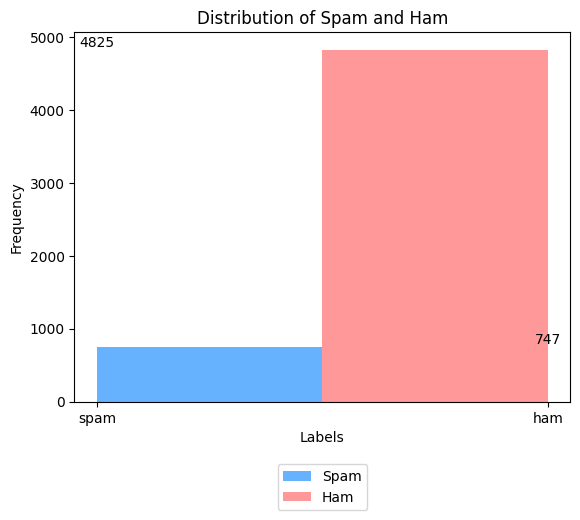

In [13]:
# Visualization of spam and not spam cases

# Count the number of observations for each category
label_counts = df['labels'].value_counts()

# Define pastel colors
pastel_colors = ['#66B2FF', '#FF9999']

# Create a histogram with pastel colors and space between bars
plt.hist([df[df['labels'] == 'spam']['labels'], df[df['labels'] == 'ham']['labels']],
         bins=2, color=pastel_colors, stacked=True, label=['Spam', 'Ham'])

# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Distribution of Spam and Ham')

for i, count in enumerate(label_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))

# Show the plot
plt.show()

In [14]:
# Binary Encoding
df['binary_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
y = df['binary_labels'].to_numpy()

In [16]:
# Split data into training and testing sets
df_train, df_test, y_train, y_test = train_test_split(df['data'], y, test_size=0.2, random_state=42)

In [17]:
# Check the shapes of the data splits
df_train.shape, df_test.shape, y_train.shape, y_test.shape

((4457,), (1115,), (4457,), (1115,))

In [18]:
# Create a CountVectorizer for text feature extraction
featurizer = CountVectorizer(decode_error='ignore')
x_train = featurizer.fit_transform(df_train)
x_test = featurizer.transform(df_test)

In [19]:
# Check the result of feature extraction
x_train

<4457x7735 sparse matrix of type '<class 'numpy.int64'>'
	with 58978 stored elements in Compressed Sparse Row format>

In [20]:
# Create the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [22]:
# Evaluate the model's performance
train_accuracy = model.score(x_train, y_train)
test_accuracy = model.score(x_test, y_test)

In [23]:
# Making predictions on the training and test data
Ptrain = model.predict(x_train)
Ptest = model.predict(x_test)

In [26]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train, y_train)
logistic_regression_pred = logistic_regression_model.predict(x_test)

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, logistic_regression_pred))
print("Classification Report:\n", classification_report(y_test, logistic_regression_pred))

Logistic Regression:
Accuracy: 0.97847533632287
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [27]:
# Calculate F1 scores for training and test data
train_f1 = f1_score(y_train, Ptrain)
test_f1 = f1_score(y_test, Ptest)

# Calculate predicted probabilities for being in class 1 (spam) for both training and test data
Prob_train = model.predict_proba(x_train)[:, 1]
Prob_test = model.predict_proba(x_test)[:, 1]

# Calculate the AUC-ROC (Area Under the Receiver Operating Characteristic) score for both training and test data
train_auc = roc_auc_score(y_train, Prob_train)
test_auc = roc_auc_score(y_test, Prob_test)

In [29]:
# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Train/Test': ['Train', 'Test'],
    'Accuracy': [train_accuracy, test_accuracy],
    'F1': [train_f1, test_f1],
    'AUC': [train_auc, test_auc]
})

In [30]:
# Display the metrics table
print(metrics_df)

  Train/Test  Accuracy        F1       AUC
0      Train  0.994391  0.978939  0.994113
1       Test  0.983857  0.937063  0.975392


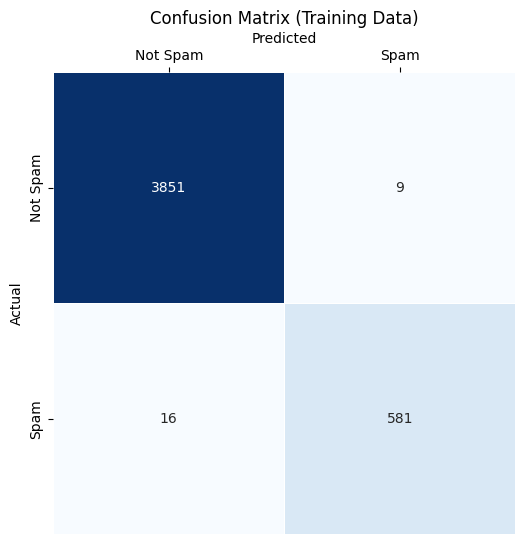

In [31]:
# Create a confusion matrix for training data
cm = confusion_matrix(y_train, Ptrain)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True, cbar=False,
            xticklabels=['Not Spam', 'Spam'],
            yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Training Data)')
plt.gca().xaxis.tick_top()  # Put x-axis labels on top
plt.gca().xaxis.set_label_position('top')
plt.ylabel('Actual')
plt.show()


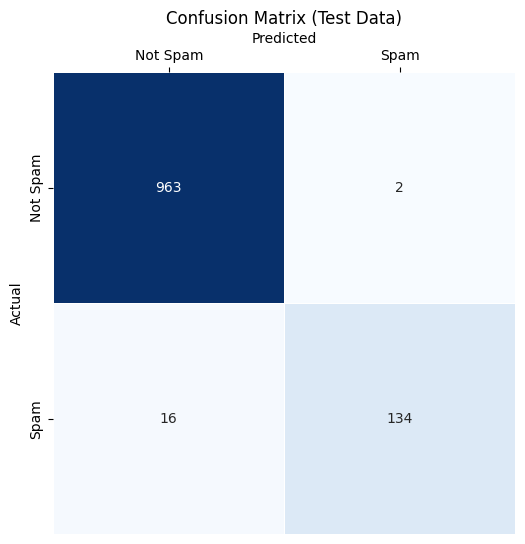

In [32]:
# Create a confusion matrix for test data
cm_test = confusion_matrix(y_test, Ptest)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True, cbar=False,
            xticklabels=['Not Spam', 'Spam'],
            yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Test Data)')
plt.gca().xaxis.tick_top()  # Put x-axis labels on top
plt.gca().xaxis.set_label_position('top')
plt.ylabel('Actual')
plt.show()

In [33]:
# Make predictions on the entire dataset
x = featurizer.transform(df['data'])
df['predictions'] = model.predict(x)

In [34]:
# The messages that were spam but were treated as not spam
unident_spam = df[(df['predictions'] == 0) & (df['binary_labels'] == 1)]['data']
for msg in unident_spam:
    print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Hi I'm sue. I am 20 years old and work as a lapdancer. I love sex. Text me live - I'm i my bedroom now. text SUE to 89555. By TextOperator G2 1DA 150ppmsg 18+
Email AlertFrom: Jeri StewartSize: 2KBSubject: Low-cost prescripiton drvgsTo listen to email call 123
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Ever thought about living a good life with a perfect partner? Just txt back NAME and AGE to join the mobile community. (100p/SMS)
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45P

In [35]:
# The messages that were not spam but were treated as spam
not_spam = df[(df['predictions'] == 1) & (df['binary_labels'] == 0)]['data']
for msg in not_spam:
    print(msg)

Waiting for your call.
Can u get pic msgs to your phone?
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Unlimited texts. Limited minutes.
Mathews or tait or edwards or anderson
Have you laid your airtel line to rest?
I liked the new mobile
Anytime...
Nokia phone is lovly..
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us


In [36]:
# Creating a word cloud
def visualize(label):
    words = ''
    for msg in df[df['labels'] == label]['data']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

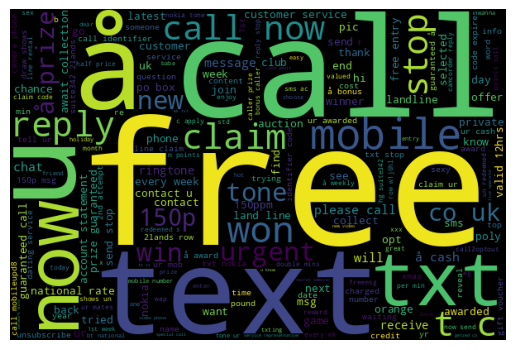

In [37]:
# The keywords that were more popular in spam category
visualize('spam')

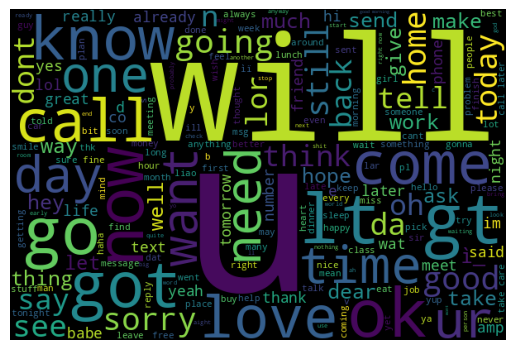

In [38]:
# The keywords that were more popular in not spam category
visualize('ham')